# <u>Answers</u>
**a) What would be your first step? List different EDA you would like to do with the data
before you get started**

EDA steps:
   - Detecting trends/patterns in data
   - Performing univariate, bivariate and multi-variate analysis
   - Use Pandas Profiling to view statistical analysis at a glance
   - Use plotly's interactive charts to understand the data better


**b) How are you going to handle missing values? Ideate and list them.**

There are different approaches to handle missing data which depends on the situation and feature type. Few of them are:
   - Drop missing values: If there are minimal number of missing values which are insignificant, we can get rid of them
   - Impute with mean/median/mode: For categorical features use mode and for numerical features use median if there are outliers else use mean.
   - Use regression models to predict the missing values

**c) Before getting into modelling, apart from points a. and b., do you want to do anything
else with the data to understand default behaviour?**

Consider the following:
   - Handle outliers (if any)
   - Check for duplicates
   - Identify data discrepancy (if any)
   - Check for feature correlation and choose one among the features which are highly correlated
   - Categorical Encoding
   - Handle imbalance target class
   - Scale the features (if using distance-based algorithms to build the model)

**d) The default labeling is based on customers who did not pay 3 installments
continuously. Do you want to rethink about this labelling strategy for the target? How
will you validate the labelling strategy is correct?**

The current labeling strategy is fine. But we need to verify this by checking whether there are any discrepancies in the provided data. Is there any customer, who hasn't paid the last 3 installments, lebelled as non-defaulter or vice-versa.

**e) What will be your X and Y?**

X will be all the independent features.
Y is the target column / dependent feature to be predicted

**f) How are you going to handle outliers, numerical columns and categorical columns?**

Ways to handle outliers:

1. Remove the outliers: Before deleting the entries having outliers, make sure the they aren’t adding any significant information and also that the dataset is not too small as deleting rows from datasets with a smaller number of records would mean losing vital information.
2. Imputation with Mean/Median/Mode: Replace the outliers with any of the measures of central tendency just as we do in missing value imputation.
3. Quantile based flooring: This method is like squeezing the far-off values so that they fall within the range.
4. Transformation: If the data is skewed, applying logarithmic, square or square root transformation might help.

Numerical features should be scaled

Categorical columns need to be encoded

**g) Do you want to include the entire 1000 features?**

We need to identify the features that are relevant and are highly important in determining the target column. We can check the correlation and see if there are redundant or unnecessary features. We can filter the pearson correlation scores of features which are highly correlated and select only 1 among them.

We can also use Random Forest or XGBoost’s Feature Importance to identify the key features.

**h) What model do you want to choose and why?**

Start with simple Logistic Regression as baseline model. We can then compare its performance with other ensemble techniques like bagging and boosting algorithms. Hyperparameter tuning is important aspect in modelling to prevent overfitting. In classification problems Random Forest can be a good pick.

**i) What is your validation strategy?**

We can use Stratified Sampling (as we have imbalanced class) to split the data into train, validation and test. Since there are a million records we can perhaps split it in the 14:3:3 ratio.

**j) How are you going to handle class imbalance?**

Oversampling or Undersampling
In this case we can use SMOTE as an oversampling technique to balance the classes in target variable.

**k) What will be your experiments and how are you going to choose the best model?**

We need to evaluate the model’s performance on the chosen performance metric. We need to look at how the model is performing on the train and test set and make sure it isn’t overfitting. We should use Cross Validation to select the best hyperparameters.

Also, we need to consider the ROC-AUC score. The model that has the highest area under the curve should be selected.

**l) What metrics are important for you in evaluating your best model?**

Our aim is to minimize the False Negatives so that we can accurately predict the potential defaulters. At the same time, we do not want to lose profitable customers by incorrectly predicting them as defaulter. Hence, we can look at F1 score which is the harmonic mean of Precision and Recall.

**m) “More than identifying defaulters, we also want to understand why they would
default; that’s the key” – The CEO specifically mentions this in his email. What is your
strategy to address this concern?**

We need to look at just the defaulters and identify their behaviour. Perhaps their credit rating, spending nature, demographic and geographic features. 
We can also try clustering the defaulters to identify their nature and patterns.


# <u>Example with a Dummy Dataset: Bank Customer Churn Prediction</u>

## Problem
Can you predict whether a customer will churn or not?

## Problem Statement
Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

## Objective
Our objective is to build a machine learning model to predict whether the customer will churn or not 

## Data Dictionary

| Variable | Description |
| :- | :- |
| ID | Unique Identifier of a row |
| Age | Age of the customer |
| Gender | Gender of the customer (Male and Female) |
| Income | Yearly income of the customer |
| Balance | Average quarterly balance of the customer |
| Vintage | No. of years the customer is associated with bank |
| Transaction_Status | Whether the customer has done any transaction in the past 3 months or not |
| Product_Holdings | No. of product holdings with the bank |
| Credit_Card | Whether the customer has a credit card or not |
| Credit_Category | Category of a customer based on the credit score |
| Is_Churn *(target variable)* | Whether the customer will churn in next 6 months or not |


## Steps Performed
   1. Loading and Understanding the data
   1. Exploratory Data Analysis
   1. Feature Engineering
   1. Model Building
   1. Model's Performance Comparison
   1. Feature Importance
   1. Conclusion
   1. Next Steps

In [12]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [15]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   object 
 2   Income              6650 non-null   object 
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   int64  
 5   Transaction_Status  6650 non-null   int64  
 6   Product_Holdings    6650 non-null   object 
 7   Credit_Card         6650 non-null   int64  
 8   Credit_Category     6650 non-null   object 
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 519.7+ KB


In [17]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [18]:
print('Train Shape: ', train.shape, '  Test Shape: ', test.shape)

Train Shape:  (6650, 10)   Test Shape:  (2851, 9)


### **From the above initial analysis it is clear that:**
   - There are 9 predictors out of which are 4 are categorical features and the rest are numericals
   - Train set has a total of 6650 records whereas there are 2851 in test set
   - There are no missing values in the datasets
   - Memory utilization by training dataset is minimal, around 520 KB
   - The statistical information tells the range and percecntile values of each numerical feature

## <u>Exploratory Data Analysis</u>

In this section we will dig deeper into the dataset and draw valuable insigths.
<p>Some of the questions which will be answered here are:
    
    1. Distribution of data
    2. Groups within each Categorical feature
    3. Group wise count of churned and retained customers in each categorical feature
    4. How is churn rate related with Age and Income of the customers
    5. Are elder customers more likely to exit?
    6. Proportion of chhurned and not churned customers

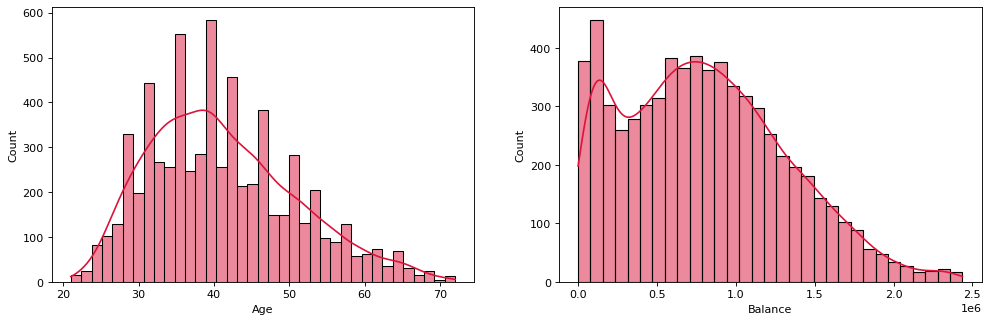

In [19]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(221)
sns.histplot(train["Age"], kde=True, color = 'crimson')

plt.subplot(222)
sns.histplot(train["Balance"], kde=True, color='crimson')
plt.show()

***Both the features are right or positive skewed distribution***

In [20]:
num_features = [i for i in train.columns if train[i].dtype != 'object']            # list of numberical features
cat_features = [i for i in train.columns if train[i].dtype == 'object']            # list of cateforical features

In [21]:
# groups within each of the categorical feature
for i in cat_features:
    print(i)
    print(train[i].unique(), '\n')

Gender
['Female' 'Male'] 

Income
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L'] 

Product_Holdings
['1' '2' '3+'] 

Credit_Category
['Average' 'Poor' 'Good'] 



In [22]:
def histplot(df, features):
    ''' Histplot of each feature with target variable '''
    for i in features:
        fig = px.histogram(train, x=i, color='Is_Churn', barmode='group', title='{} vs Churn'.format(i), height=400, width=700)
        fig.show()

In [23]:
histplot(train, cat_features)

***From the above we conclude that:***
   - Greater percentage of females are likely to churn
   - Higher Income customers with earnings greater than 10 Lakhs are more likely to churn
   - Almost equal number of customers have 1 to 2 products holdings. It's rare for a customer to have 3 or more product holdings. Also, there is no such distinction in churn rate based on number of product holdings.
   - Customers with poor credit ratings dominate the dataset and are also more likely to exit

In [24]:
px.scatter(data_frame=train, y='Income', x='Age', color='Is_Churn', size='Balance')

***We see that elderly customers are hard to retain. Also, customers with high income are more likely to churn***

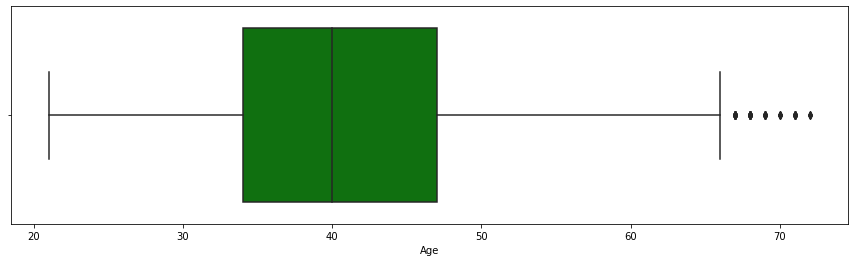

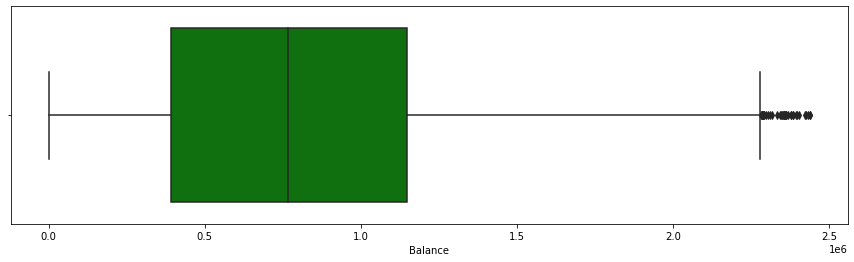

In [25]:
# to detect outliers in Age and Balance 

for i in ['Age', 'Balance']:
    plt.figure(figsize=(15,4))
    sns.boxplot(train[i], color='green')
    plt.show()

***We see a couple of outliers in the Age feature whereas there are quite a few in Balance feature***

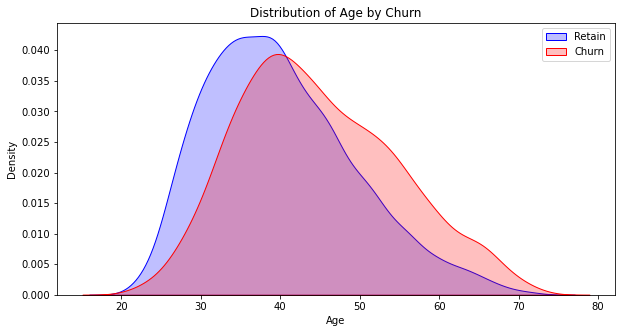

In [26]:
# Variation of churn rate with age of customers

plt.figure(figsize=(10,5))
ax = sns.kdeplot(train['Age'][(train['Is_Churn'] == 0)], color = 'Blue', shade=True)
ax = sns.kdeplot(train['Age'][(train['Is_Churn'] == 1)], color = 'Red', shade=True)

ax.legend(['Retain', 'Churn'], loc = 'upper right')
ax.set_ylabel("Density")
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by Churn')
plt.show()

***The above plot confirms our earlier finding that elder people are hard to retain. The blue region (Retained) is centered around 35 and is slightly right skewed whereas the red region (Churned) is centered around 40***

In [27]:
# Behaviour of customers in different credit categories

# pd.set_option('display.float_format', lambda x: '%0.0f' % x)
# df = train[['Credit_Category', 'Income', 'Gender', 'Balance']].groupby(['Credit_Category', 'Income', 'Gender']).sum().reset_index()

In [28]:
# px.sunburst(df, path=['Credit_Category', 'Income', 'Gender'], color = 'Balance', values='Balance')

***The above interactive sunburst groups the customers based on credit ratings, income and gender. It can be concluded that customers with high account balance tend to have poor credit ratings. Also it gives information about the account balances of customers based on their credit category, income and gender***

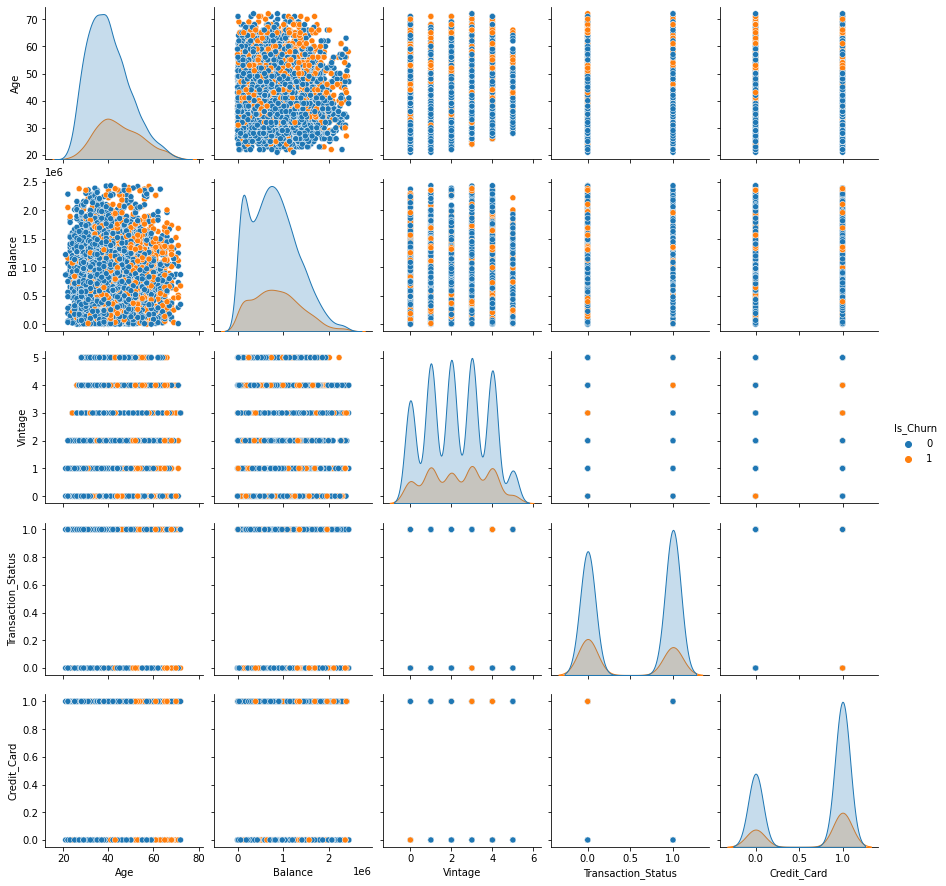

In [29]:
# Variation of each feature with respect to other features
sns.pairplot(train, hue='Is_Churn')
plt.show()

***The above pairplot shows that no two feature has linear relation. It also confirms our earlier findings that elderly people are more likely to churn and new customers who have been served for less than 2 years are more likely to churn. Long term customers seem to be happy with the service and are less likely to leave***

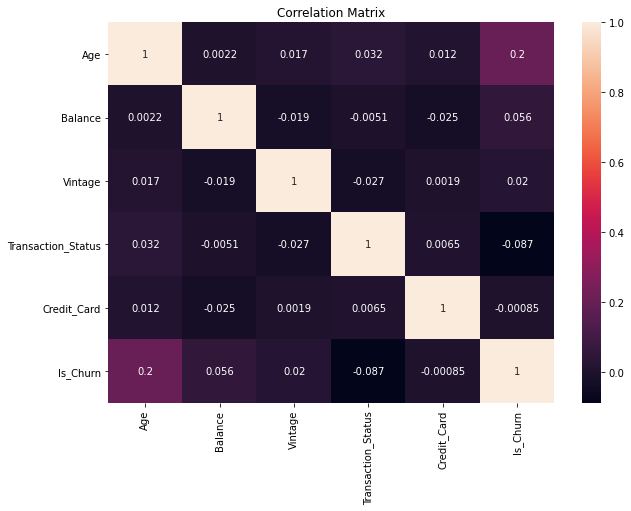

In [30]:
# Relationship strength among the features

plt.figure(figsize=(10,7))
sns.heatmap(train.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

***Strong determinant of whether a customer leaves or not is the Customer's Age followed by his transaction status and account balance***

In [32]:
# Percent of churned vs not-churned customers

labels = ['Exited', 'Retained']
values = [train.Is_Churn[train['Is_Churn']==1].count(), train.Is_Churn[train['Is_Churn']==0].count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1], title='Proportion of customer churned and retained')])
fig.show()

***We have imbalanced class in the target feature. Only 23% customers have churned***

## <u>Feature Engineering</u>

We have a good understanding of the data from the previous section. Here, we will alter the dataset to make it model ready. We are going to perform the following operations:
   1. Handle Missing Values
   2. Handle Outliers
   3. Encode Categorical Features
   4. Feature Scaling
   5. Imbalanced Dataset
   6. Feature Selection 

In [33]:
# import libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### 1. Missing Values

In [34]:
train.isnull().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [35]:
test.isnull().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

**We do not see any missing values in either of the datasets**

### 2. Handling Outliers
In the EDA section we identified that Age and Balance features do have a couple of outliers and since, all are beyond the upper limit we will consider the upper range only to detect the outliers in this scenario.

In [36]:
def upper_bound(df, feat):
    ''' Calculate IQR and the respective upper and lower bounds '''
    upper = lower = per25 = per75 = iqr = 0
    per25 = np.percentile(df[feat], 25)
    per75 = np.percentile(df[feat], 75)
    iqr = per75 - per25
    lower = per25 - (1.5*iqr)
    upper = per75 + (1.5*iqr)
    return upper

In [37]:
# Count of outliers for each feature in train as well as test set

print("Train: In Age", train[train['Age']>upper_bound(train, 'Age')].shape[0], ' In Balance: ', train[train['Balance']>upper_bound(train, 'Balance')].shape[0])
print("Test: In Age", test[test['Age']>upper_bound(test, 'Age')].shape[0], ' In Balance: ', test[test['Balance']>upper_bound(test, 'Balance')].shape[0])

Train: In Age 57  In Balance:  38
Test: In Age 25  In Balance:  18


In [38]:
# Replacing the outliers with the upper limit values

train['Age'] = train['Age'].apply(lambda x: round(upper_bound(train, 'Age')) if (x > upper_bound(train, 'Age')) else x)
test['Age'] = test['Age'].apply(lambda x: round(upper_bound(test, 'Age')) if (x > upper_bound(test, 'Age')) else x)

train['Balance'] = train['Balance'].apply(lambda x: round(upper_bound(train, 'Balance')) if (x > upper_bound(train, 'Balance')) else x)
test['Balance'] = test['Balance'].apply(lambda x: round(upper_bound(test, 'Balance')) if (x > upper_bound(test, 'Balance')) else x)

We see that there are 57 and 25 outliers in Age feature and 38 and 18 in Balance feature in train and test set respectively. Replacing these values with the upper bound value will be advantageous while Binning these features in the later section.
<p>Verifying if any outliers exist:

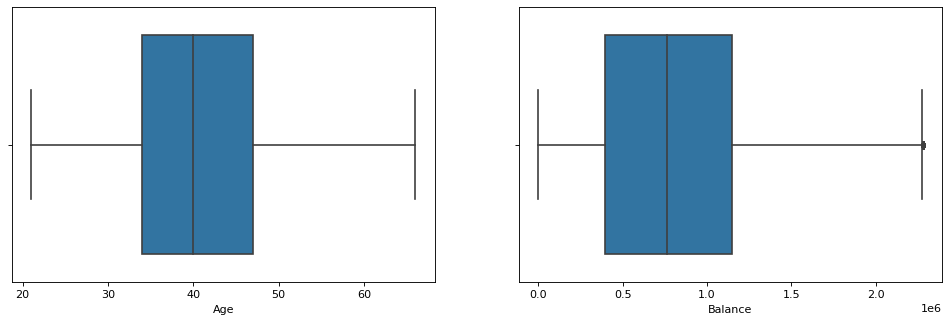

In [39]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(221)
sns.boxplot(train["Age"])

plt.subplot(222)
sns.boxplot(train["Balance"])
plt.show()

### 3. Encoding

Models understand only numbers. Hence, it is crucial to conver the categorical features to numerical values. There are multiple ways of achieving this. For example Label Encoding isused in case of ordinal values in categorical feature whereas One-Hot encoding can be used for nominal values. 

In [40]:
# checking the groups within categorical features

for i in cat_features:
    print(i)
    print(train[i].unique(), '\n')

Gender
['Female' 'Male'] 

Income
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L'] 

Product_Holdings
['1' '2' '3+'] 

Credit_Category
['Average' 'Poor' 'Good'] 



#### Mapping

In [41]:
# Mapping Gender and Product Holdings values with numbers

train['Product_Holdings'] = train['Product_Holdings'].map({'1': 1, '2': 2, '3+': 3})
test['Product_Holdings'] = test['Product_Holdings'].map({'1': 1, '2': 2, '3+': 3})

train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1})
test['Gender'] = test['Gender'].map({'Female': 0, 'Male': 1})

#### Label Encoding

In [42]:
# Label Encoding Income and Credit Category

le_cols = ['Income', 'Credit_Category']
def LE(train, test):
    le = LabelEncoder()
    for col in le_cols:
            train[col] = le.fit_transform(train[col])
            test[col] = le.transform(test[col])
    return train, test

train_en, test_en = LE(train, test)

In [43]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266.44,4,0,1,0,0,1
1,53,0,2,875572.11,2,1,1,1,2,0
2,35,0,3,701607.06,2,1,2,0,2,0
3,43,0,3,1393922.16,0,1,2,1,2,1
4,39,0,3,893146.23,1,1,1,1,1,1


### 4. Scaling
Scaling is an important part of Feature Engineering. The idea behind scaling is to bring down all the values in a feature within a certain range. Here, we have used MinMax scaler on Vintage feature to squeeze all the values in the range of 0-1.

In [44]:
train['Vintage'].unique()

array([4, 2, 0, 1, 3, 5], dtype=int64)

In [45]:
scaler = MinMaxScaler()
num_features = ['Vintage', 'Age', 'Balance']

train[num_features] = scaler.fit_transform(train[num_features])
test[num_features] = scaler.transform(test[num_features])

train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,0.333333,0,1,0.247089,0.8,0,1,0,0,1
1,0.711111,0,2,0.384105,0.4,1,1,1,2,0
2,0.311111,0,3,0.307783,0.4,1,2,0,2,0
3,0.488889,0,3,0.611516,0.0,1,2,1,2,1
4,0.400000,0,3,0.391815,0.2,1,1,1,1,1


### 5. Handling Imbalanced Class
In case of classification problems we should ensure the distribution of the classes in target feature. As the customers churned are quite less in number in the dataset, we need to adjust and balance the classes (churn vs not_churned). There are 2 techniques by which this can be achieved: Over-sampling and Under Sampling. ADASYN worked better than SMOTE in this case.

In [46]:
# X = train.drop('Is_Churn', axis=1)
# y = train['Is_Churn']

# sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 1, random_state = 42)
# x_train_miss, y_train_miss = sm.fit_resample(X, y.ravel())

# x_train, x_test, y_train, y_test = train_test_split(x_train_miss, y_train_miss, test_size=0.3, random_state=42)

In [47]:
X = train.drop('Is_Churn', axis=1)
y = train['Is_Churn']

ad = ADASYN(sampling_strategy = 'minority', n_neighbors = 5, random_state = 140)
x_train_miss, y_train_miss = ad.fit_resample(X, y.ravel())

x_train, x_test, y_train, y_test = train_test_split(x_train_miss, y_train_miss, test_size=0.3, random_state=42)

## <u>Model Building</u>

In [48]:
# importing libraries for this section 

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier, RidgeClassifier
import xgboost
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.layers import Dense, Dropout 

In [49]:
def model_score(model):
    '''To print classification report and confusion matrix for each model'''
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.set_context('talk')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

### Logistic Regression

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      1567
           1       0.59      0.55      0.57      1411

    accuracy                           0.61      2978
   macro avg       0.61      0.61      0.61      2978
weighted avg       0.61      0.61      0.61      2978



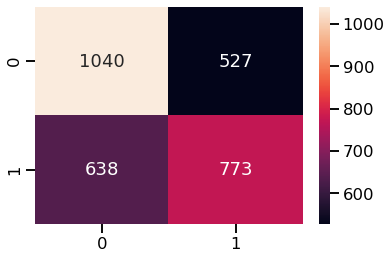

In [50]:
# lg = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, max_iter=2000)
lg = LogisticRegressionCV(penalty='l2', solver='sag', cv=5, max_iter=2000)

lg.fit(x_train, y_train)

model_score(lg)

### SGDClassifier

In [220]:
model_sgd=SGDClassifier()
parameters = {'loss':['log','hinge','modified_huber','squared_hinge','perceptron'],
              'alpha':[0.1, 0.01, 0.05], 
              'n_jobs': np.arange(200,600,100),
              'max_iter': np.arange(500, 1500, 200)}
model_sgd_grid = GridSearchCV(model_sgd, parameters,cv=10,verbose=1,n_jobs=-1).fit(x_train,y_train)
print(model_sgd_grid.best_params_)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
{'alpha': 0.05, 'loss': 'modified_huber', 'max_iter': 500, 'n_jobs': 400}


              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1567
           1       0.59      0.59      0.59      1411

    accuracy                           0.61      2978
   macro avg       0.61      0.61      0.61      2978
weighted avg       0.61      0.61      0.61      2978



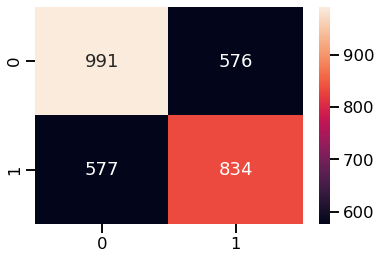

In [51]:
# sgd = SGDClassifier(loss='modified_huber', n_jobs=300, max_iter=900, alpha=0.01)
sgd = SGDClassifier(loss='modified_huber', n_jobs=400, max_iter=500, alpha=0.05)

sgd.fit(x_train, y_train)

model_score(sgd)

### Random Forest

In [40]:
# Cross Validating to get the best hyperparameters

params = {'max_depth':[3, 5, 10, 13], 
          'n_estimators':[100, 200, 400, 600, 900],
          'max_features':[2, 4, 6, 8, 10]}

model = RandomForestClassifier()
gs = GridSearchCV(
        estimator=model,
        param_grid=params, 
        cv=3, 
        n_jobs=-1, 
        scoring='f1',
        verbose=2
    )
fitted_model = gs.fit(x_train, y_train)
fitted_model.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomForestClassifier(max_depth=13, max_features=8, n_estimators=200)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1567
           1       0.84      0.70      0.76      1411

    accuracy                           0.80      2978
   macro avg       0.80      0.79      0.79      2978
weighted avg       0.80      0.80      0.79      2978



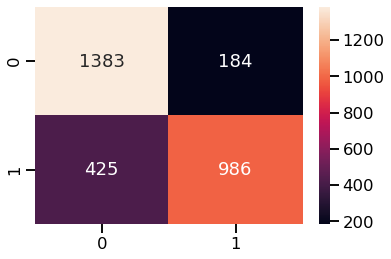

In [52]:
rf= RandomForestClassifier(max_depth=13, max_features=8, n_estimators=200, bootstrap=True, min_samples_leaf=3, min_samples_split=5)
rf.fit(x_train,y_train)

model_score(rf)

### Stacking

              precision    recall  f1-score   support

           0       0.62      0.67      0.64      1567
           1       0.60      0.55      0.57      1411

    accuracy                           0.61      2978
   macro avg       0.61      0.61      0.61      2978
weighted avg       0.61      0.61      0.61      2978



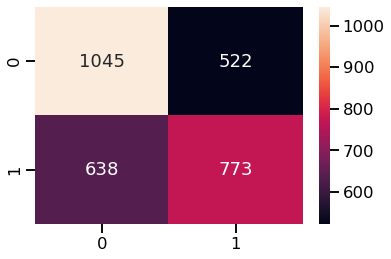

In [53]:
stack = StackingCVClassifier(classifiers=(lg, sgd),
                            meta_classifier=lg, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                             stratify=True,
                            shuffle=False,
                            random_state=42)

stack.fit(x_train, y_train)

model_score(stack)

### ANN

In [54]:
# Training a simple Artificial Neural Network
ann = keras.Sequential([
    keras.layers.Dense(2, input_dim=9, activation='leaky_relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
ann.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])
history = ann.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose=0, batch_size=100)

In [56]:
def model_score_ann(model):
    ''' model score for ann. Converting the continuous variables to 0s and 1s'''
    yp = model.predict(x_test)
    y_pred = []
    for i in yp:
        if i<0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
        
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.set_context('talk')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1567
           1       0.58      0.60      0.59      1411

    accuracy                           0.61      2978
   macro avg       0.61      0.61      0.61      2978
weighted avg       0.61      0.61      0.61      2978



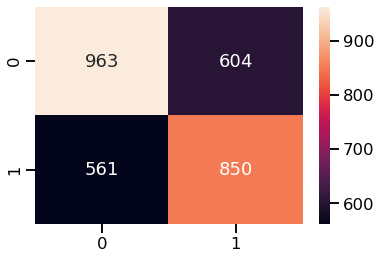

In [57]:
model_score_ann(ann)

## <u>Model Comparison</u>

In [58]:
# calculating the false positive and true positive rate for each of the models
fpr1, tpr1, thresh1 = roc_curve(y_test, lg.predict_proba(x_test)[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, sgd.predict_proba(x_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf.predict_proba(x_test)[:, 1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, stack.predict_proba(x_test)[:, 1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, ann.predict(x_test), pos_label=1)

In [59]:
# Fething the Area under the curve 
auc_score1 = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])
auc_score2 = roc_auc_score(y_test, sgd.predict(x_test))
auc_score3 = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])
auc_score4 = roc_auc_score(y_test, stack.predict_proba(x_test)[:, 1])
auc_score5 = roc_auc_score(y_test, ann.predict(x_test))

print("Logistic Regression: ", auc_score1)
print("SGD: ", auc_score2)
print("Random Forest: ", auc_score3)
print("Stacking: ", auc_score4)
print("Artificial Neural Network: ", auc_score5)

Logistic Regression:  0.6539058369443841
SGD:  0.6117443986690408
Random Forest:  0.8649715043212755
Stacking:  0.6522247253211954
Artificial Neural Network:  0.6521632157218535


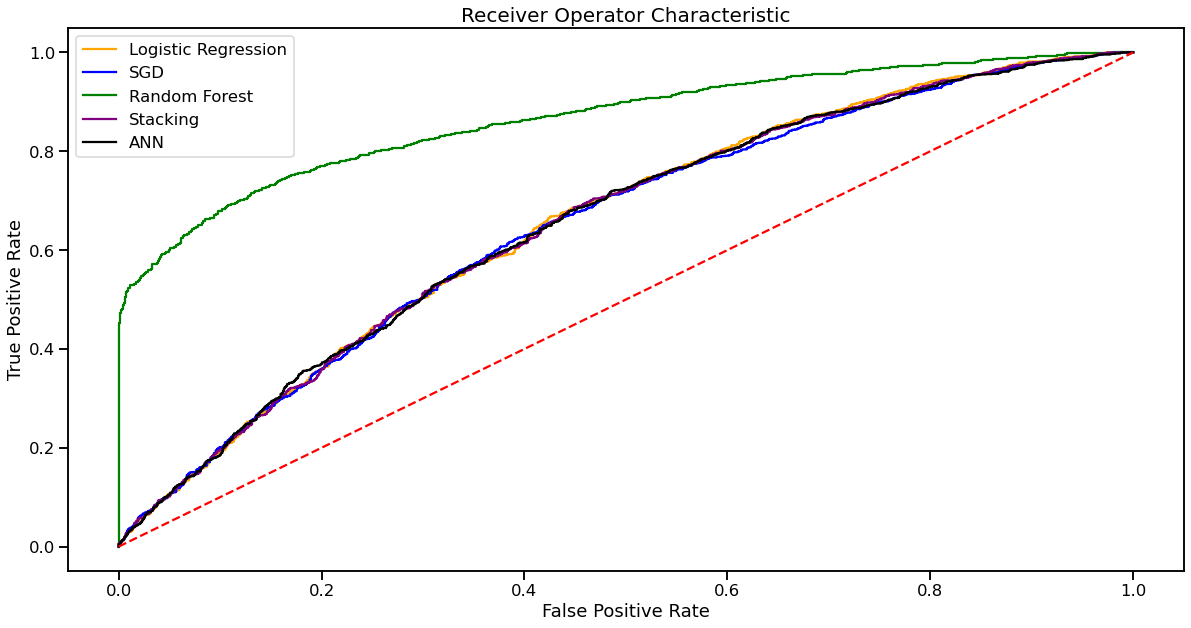

In [62]:
# Plotting ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1,  color = 'orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, color = 'blue', label='SGD')
plt.plot(fpr3, tpr3, color = 'green', label='Random Forest')
plt.plot(fpr4, tpr4, color = 'purple', label='Stacking')
plt.plot(fpr5, tpr5, color = 'black', label='ANN')
         
plt.title('Receiver Operator Characteristic', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--') 
plt.legend(loc = 'best')
plt.show()

**Model Comparison Results:**
- ROC-AUC curve shows the model performance by plotting the false positive rate to true positive rate
- More the skewness of the curve towards the upper left corner higher is the area under the roc curve and better is the model performance
- From the ROC-AUC curve it is clear that Logistic Regression and ANN performed poorly. ANN could have been tuned and adding more layers might help in increasing the model's performance
- Random Forest showed a tremendous performance but it is likely to overfit.
- Stacking is basically a custom ensemble technique where we can combine models of our choice. 
- Both Random Forest and Stacking are ensemble techniques but there is a drastic difference in both their performance.
- Most of the models have achived around 64% accuracy

## <u>Feature Importance</u>

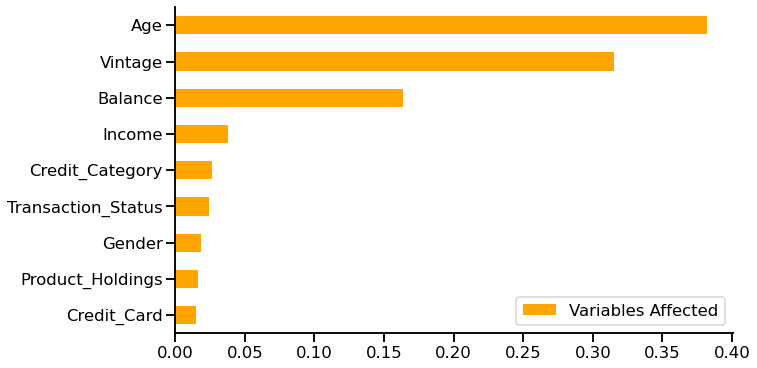

In [61]:
feat_scores = pd.DataFrame({'Variables Affected': rf.feature_importances_}, index=X.columns)
feat_scores = feat_scores.sort_values(by = 'Variables Affected')
feat_scores.plot(kind = 'barh', figsize=(10,6), color='orange')
sns.despine()

Feature Importance gives a very clear idea on which feature is the strongest in terms of determining the target variable. From the above representation Age and Vintage feature are the most effective features. The bank should focus on these features to reduce the churn rate. Also, the number of product holdings and whether a customer has a credit card contributes the least in target prediction.

## <u>Summary</u>

In this classification problem the dataset given was quite clean, it had no missing values and a lot of information regarding the customers' was provided.
<p>
It was a binary classification problem with only 2 classes in the target feature (0: not churned, 1: churned). The classes were imbalanced and the models were predicting all 0s in the target feature. To resolve this we had used over-sampling technique. 
<p>
We used different encoding techniques depending on the feature type. We used Label Encoder for ordinal values whereas one hot encoding for the nominal ones. The Age and Balance features were binned and encoded later on.

<b>One important takeaway is new customers are more likely to churn and also customers with high income are hard to retain. The Bank can focus on these 2 groups to bring down the churn rate.

## <u>Next Steps</u>

To improve the model performance and to get higher accuracy the below things can be done:
   - A model's performance increases with increase in data (clean and relevant). If we can feed in more data we can achieve higher accuracy.
   - We can try extracting features like (Product_Holdings - Credit_Card) assuming credit card as one of the products we can fetch how many other products the customer is holding.
   - Experimenting with under-sampling to see whether there is any change in model performance
   - We can use hyperparameter tuning for the other algorithms like we have done for Random Forest
   - Trying other ensemble techniques like XGBoost and CatBoost might also help